In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lets get the data into the dataframe using pandas

In [2]:
data=pd.read_csv("the_office_series.csv")
#View the dataset as i is imported
data.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


## Lets check for the datatypes of columns and see if we need to change anyone. As there is date column, which may need to change

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


## As we have gussed, date is object type. It is better to change that to datetime.

In [4]:
data['Date']=pd.to_datetime(data['Date'])
print(data['Date'].dtypes)

datetime64[ns]


## First Column should be episode number irrespective of the season noumber. Further, it should start from 1.

In [6]:
data= data.rename(columns={"Unnamed: 0":"Episode_no"})

In [7]:
data['Episode_no']=data["Episode_no"]+1

## Now see if any column have any missing values

In [8]:
data.isna().sum()

Episode_no        0
Season            0
EpisodeTitle      0
About             0
Ratings           0
Votes             0
Viewership        0
Duration          0
Date              0
GuestStars      159
Director          0
Writers           0
dtype: int64

## Only Guest Starts have missing values as many episodes may not have any guest start in it. It is better to convert it into 0 than keeping it has NaN.

In [9]:
data=data.fillna({'GuestStars':0})

## Now our dataset doesnot have any missing value and all dtypes are set to desired ones. Lets dive into graphical EDA and see what we have in our dataset.
1. See viewership based on episodes

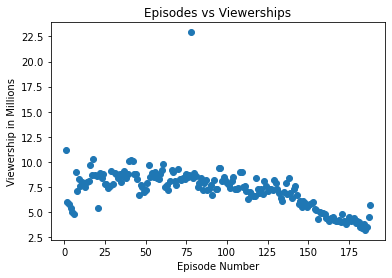

In [11]:
plt.scatter(data['Episode_no'], data['Viewership'])
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.savefig('epi_view_1.png')
plt.show()

## We can create same graph with seaborn also using the following code.

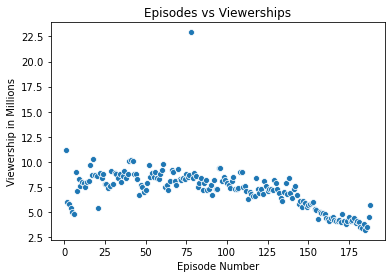

In [14]:
sns.scatterplot(x='Episode_no', y='Viewership', data=data)
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.savefig('epi_view_sea_1')
plt.show()

## Above Figure is good. We can see that viewership declined with time. Plus there is one outlier with 22.5 million viwership. 
Graphical EDA helps to identify the outliers also. We need to remove this one by identifying it.

In [16]:
#Find the season number where outlier was obsereved
season_no=int(data.loc[data['Viewership']>15, 'Season'])
#Find the average of rating of that season
season_avg=data.loc[data['Season']==season_no, 'Viewership'].mean()
#Replace outlier with the average value
data.loc[data['Viewership']>15, 'Viewership']=season_avg

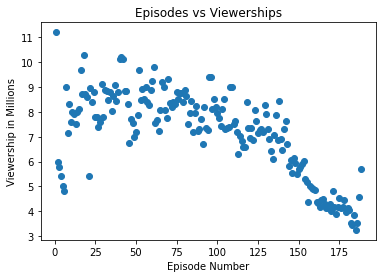

In [17]:
plt.scatter(data['Episode_no'], data['Viewership'])
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.savefig('epi_view_no_out.png')
plt.show()

## We need to see whether the viewership decreased with decreased in rating also. But our rating column is a float and it is difficult to give colors to above scatter plot based on this. We need to make categories of these columns.

In [18]:
range=[0,7,8,9,10]
names=['0-7','7-8','8-9','9-10']
data['rating_cat']=pd.cut(data['Ratings'], bins=range, labels=names)
data['rating_cat'].head()

0    7-8
1    8-9
2    7-8
3    8-9
4    8-9
Name: rating_cat, dtype: category
Categories (4, object): [0-7 < 7-8 < 8-9 < 9-10]

In [15]:
data['rating_cat'].value_counts()

8-9     104
7-8      63
9-10     15
0-7       6
Name: rating_cat, dtype: int64

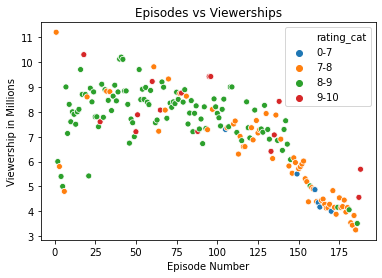

In [39]:
sns.scatterplot(x='Episode_no', y='Viewership', hue='rating_cat', data=data, hue_order=['0-7','7-8','8-9','9-10'])
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.savefig('epi_view_rating.png')
plt.show()

## Lets find the season average and the median episode number of that season so that we can plot a line graph to show the average rating.

In [30]:
season_avg=data['Viewership'].groupby(data['Season']).mean()
season_mid=data['Episode_no'].groupby(data['Season']).median()
print(season_mid)

Season
1      3.5
2     17.5
3     40.0
4     58.5
5     78.5
6    104.5
7    129.5
8    153.5
9    177.0
Name: Episode_no, dtype: float64


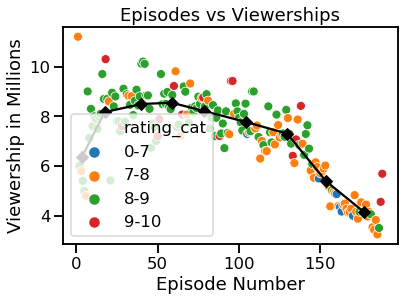

In [54]:
sns.scatterplot(x='Episode_no', y='Viewership', hue='rating_cat', data=data, hue_order=['0-7','7-8','8-9','9-10'])
plt.plot(season_mid, season_avg, marker='D', color='black')
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.savefig('epi_view_rating_season_avg.png')
plt.show()

## We can also make seperate graphs for every season based on rating and viewerships.

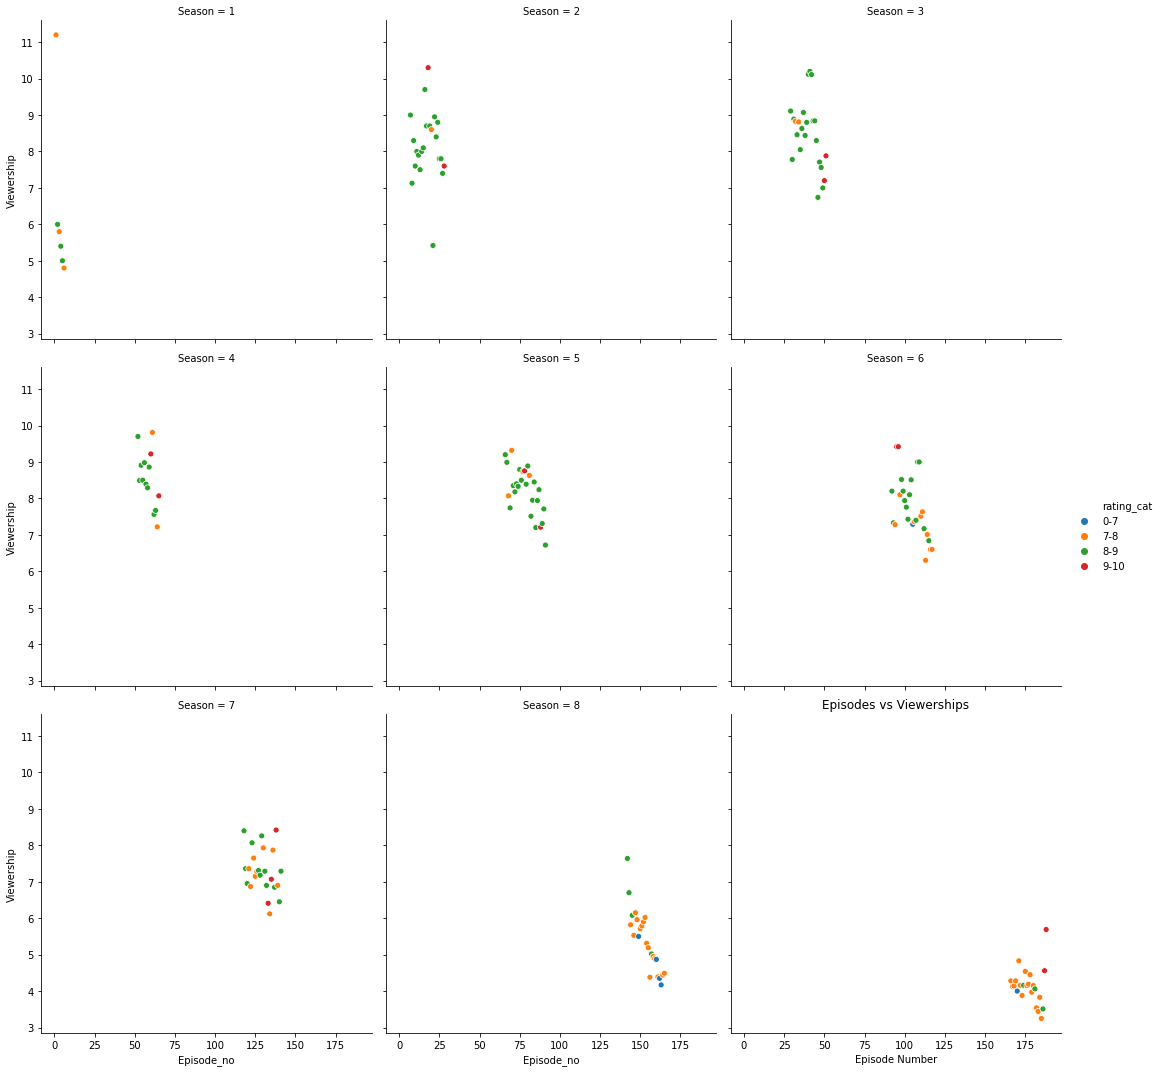

In [24]:
sns.relplot(x='Episode_no', y='Viewership', hue='rating_cat', data=data, hue_order=['0-7','7-8','8-9','9-10'], kind='scatter', 
col='Season', col_wrap=3)
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.savefig('epi_view_rating.png')
plt.show()

In [ ]:
season=data.loc[data[]]

## After looking to the graph above we can say that rating of this season also dropped along with the viwership. So, quality of this season was not upto the mark to keep people engaged with it.

## Lets see if having a guest star helps in getting higher viewerships. Add size factor to the scatter plot created above.

1. Before doing that we need to add a new column which stores if guest start was present or not in the episode.

In [42]:
data['has_guest']='NA'

In [43]:
data.loc[data['GuestStars']==0, 'has_guest']='No'
data.loc[data['GuestStars']!=0, 'has_guest']='Yes'

In [44]:
data['has_guest'].value_counts()

No     159
Yes     29
Name: has_guest, dtype: int64

In [74]:
import matplotlib
matplotlib.rc_file_defaults()

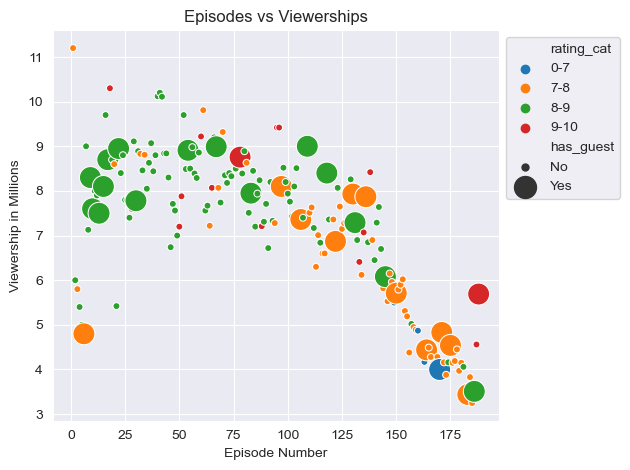

In [78]:
sns.set_style("darkgrid")
sns.scatterplot(x='Episode_no', y='Viewership', hue='rating_cat', data=data,hue_order=['0-7','7-8','8-9','9-10'], size='has_guest', sizes=[25,250])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.tight_layout()
plt.savefig('epi_view_guest.png')
plt.show()

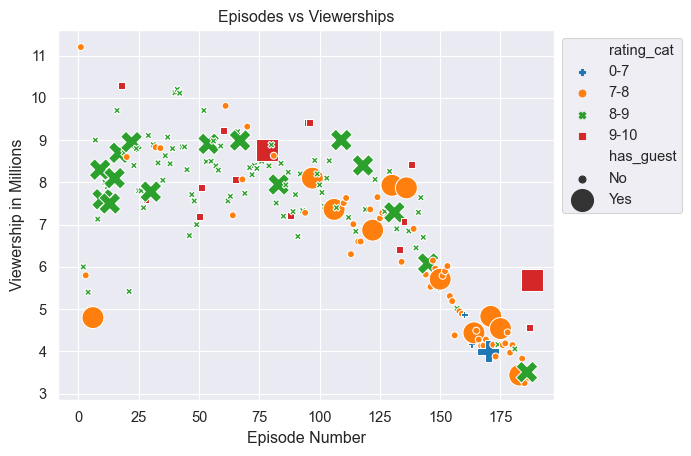

<Figure size 1000x600 with 0 Axes>

In [85]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
sns.scatterplot(x='Episode_no', y='Viewership', hue='rating_cat', data=data,hue_order=['0-7','7-8','8-9','9-10'], size='has_guest', 
sizes=[25,250], style='rating_cat')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.savefig('epi_view_guest.png')
plt.show()

In [107]:
data['moving_avg']=data.Viewership.rolling(6).mean()

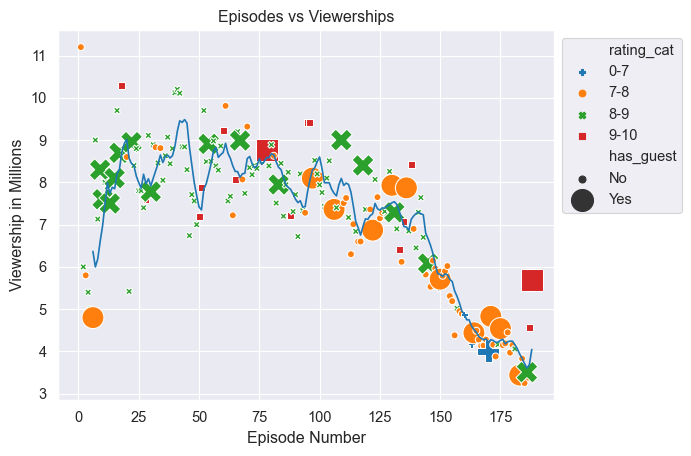

<Figure size 1000x600 with 0 Axes>

In [108]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
sns.scatterplot(x='Episode_no', y='Viewership', hue='rating_cat', data=data,hue_order=['0-7','7-8','8-9','9-10'], size='has_guest', 
sizes=[25,250], style='rating_cat')
plt.plot(data.Episode_no, data.moving_avg)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.savefig('epi_view_guest.png')
plt.show()

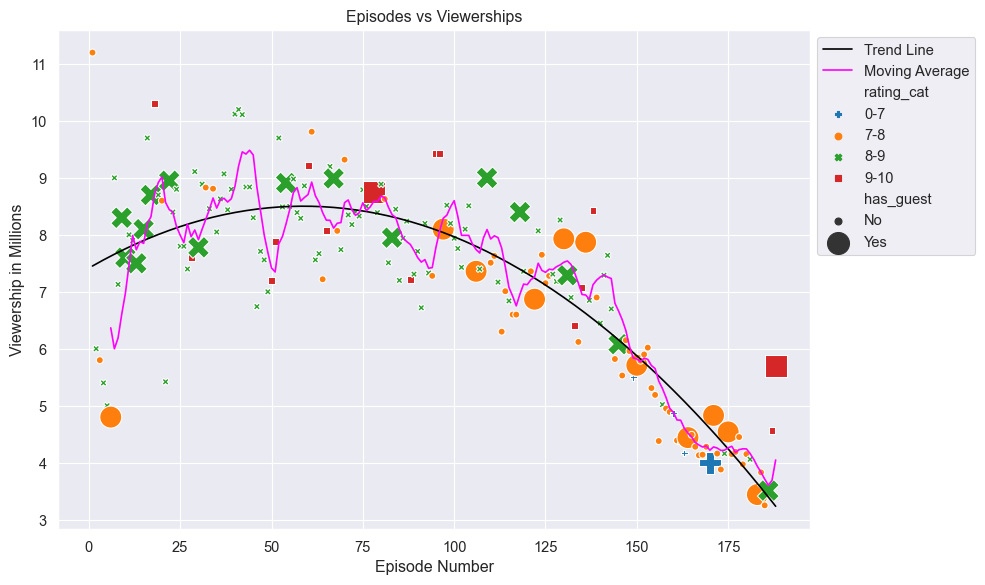

In [130]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)
sns.scatterplot(x='Episode_no', y='Viewership', hue='rating_cat', data=data,hue_order=['0-7','7-8','8-9','9-10'], size='has_guest', 
sizes=[25,250], style='rating_cat')
# calc the trendline
z = np.polyfit(data.Episode_no, data.Viewership, 2)
p = np.poly1d(z)
plt.plot(data.Episode_no,p(data.Episode_no),color="black", label="Trend Line")
plt.plot(data.Episode_no, data.moving_avg, color='magenta', label="Moving Average")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Episode Number')
plt.ylabel('Viewership in Millions')
plt.title('Episodes vs Viewerships')
plt.tight_layout()
plt.savefig('epi_view_guest_beauti.png', dpi=300)
plt.show()